<center> <h2> Graduate-level Report-2 Tasks </h2> </center>

<center> <h3> IMAGE LIBRARY CLASSIFICAION </h3> </center>

### 1.Motivation 


- With the use of artificial Intelligence we are going to initiate an image library to <br>
  classify various types of objects  from the imegaes given. We are retireiving our dataset <br>
  from online sources.

#### 2. Tasks

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms,models
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm_notebook
from IPython.core.display import HTML,display
from PIL import Image
import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")
import tensorflow as tf
# from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
# import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# K.clear_session()

In [2]:
# Read the image folders
# image folder 
images = os.listdir('images')


### 3. Create Image Library 

In [3]:
# count the number of images in each folder
def count_(path):
    for pat in pathlib.Path(path).glob('*'):
        if pat.is_dir():
            print("There are {} images in {}".format(len(os.listdir(pat)), pat))
            if os.path.isfile(pat):
                print("There is 1 image in {}".format(pat))
            

# def read_images(images):
#     image_list = []
#     for image in images:
#         image_list.append(os.listdir(f'images/{image}'))
#     return image_list

path = 'images'
count_(path)

    
# path = read_images(images)

There are 50 images in images/Apple
There are 50 images in images/Bitter_Melon
There are 50 images in images/Brinjal_Dotted
There are 50 images in images/Chilli
There are 50 images in images/Fig
There are 30 images in images/Green_Orange
There are 50 images in images/Green_Paper
There are 50 images in images/Khira
There are 50 images in images/Kiwi
There are 50 images in images/Onion
There are 50 images in images/Papper
There are 50 images in images/Pomogranate
There are 50 images in images/Red_Cabbage
There are 50 images in images/SMG
There are 50 images in images/Sapodilla
There are 50 images in images/Spoung_Gourd
There are 50 images in images/Straberry
There are 50 images in images/Tomato_Green
There are 50 images in images/Tomato_Red
There are 50 images in images/Watermellon


### 3.1 Image Processing

Enhance the clarity of the images


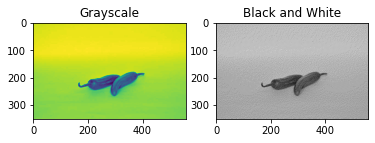

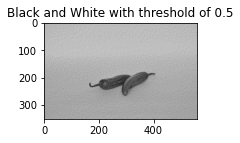

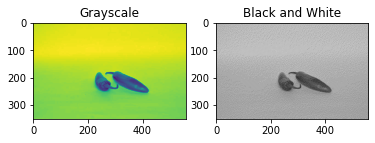

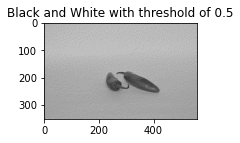

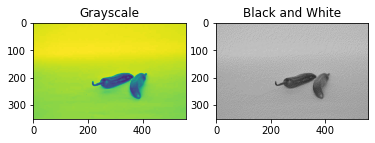

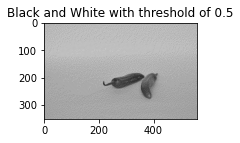

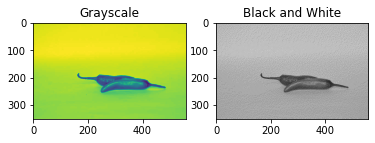

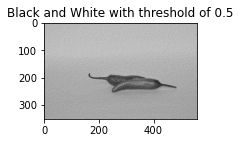

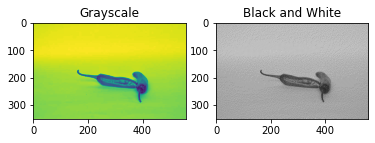

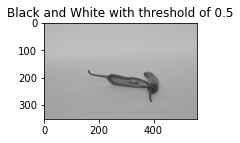

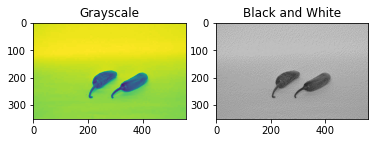

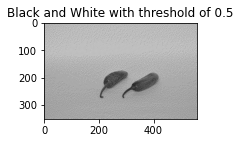

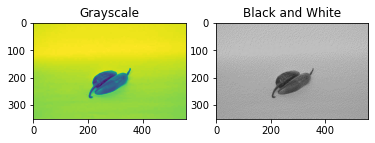

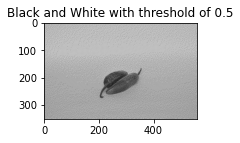

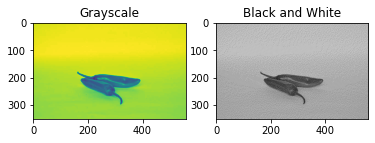

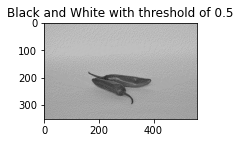

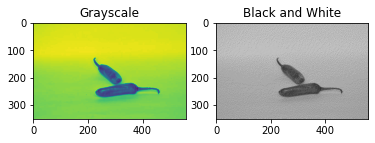

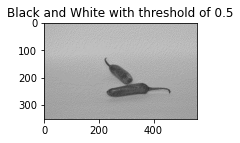

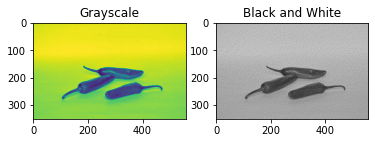

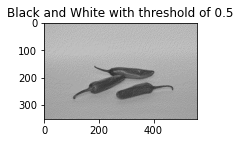

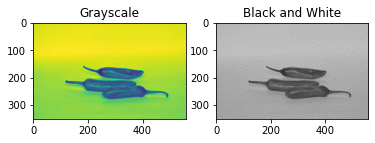

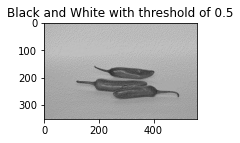

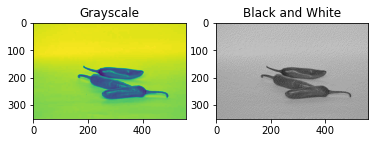

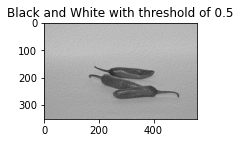

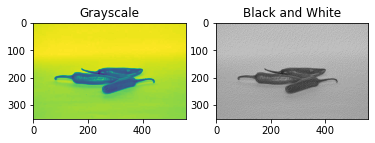

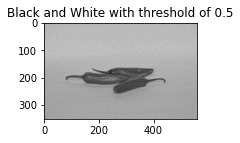

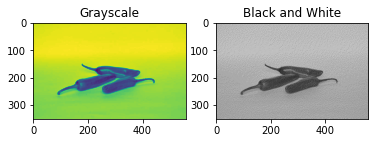

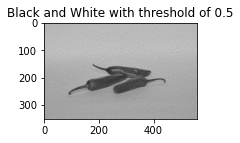

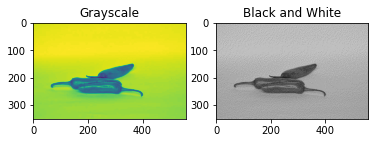

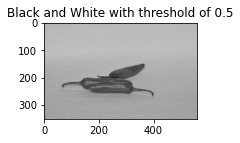

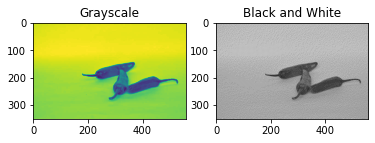

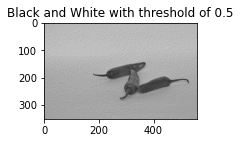

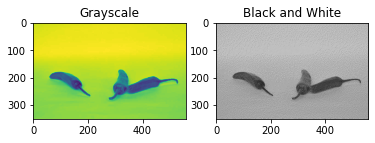

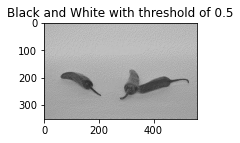

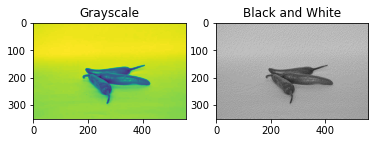

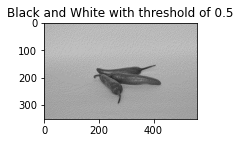

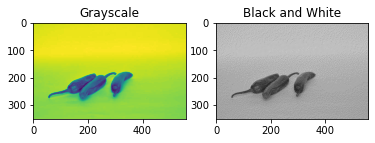

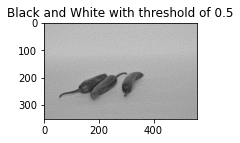

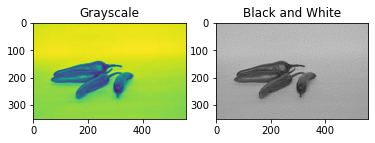

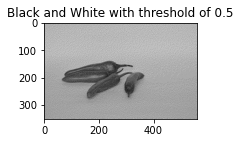

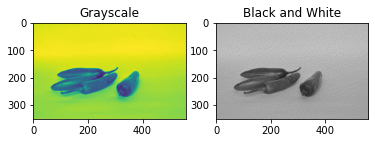

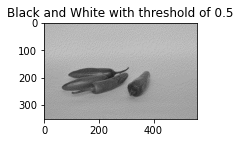

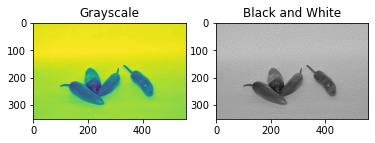

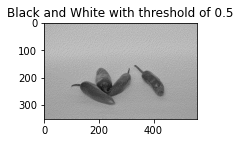

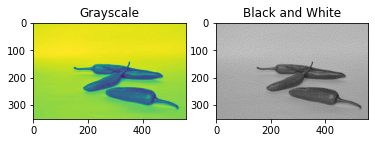

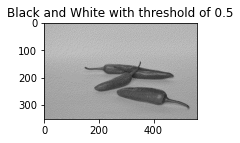

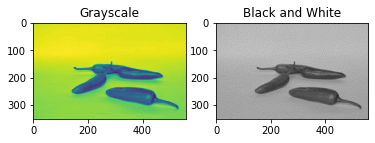

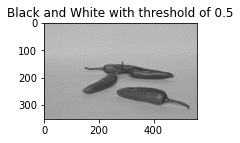

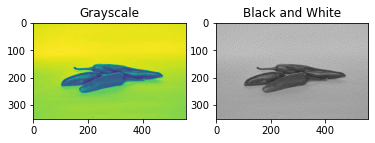

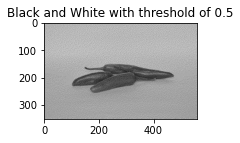

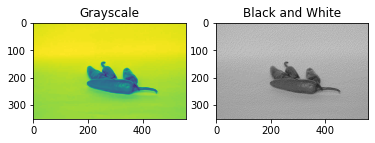

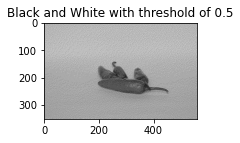

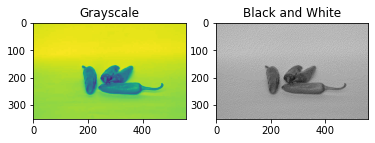

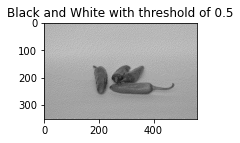

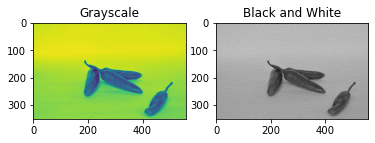

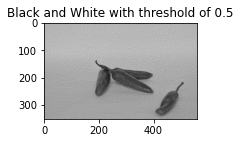

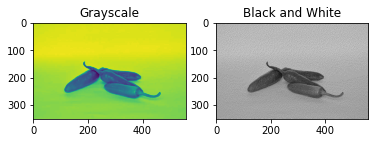

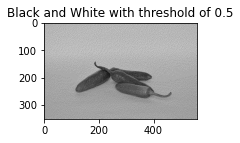

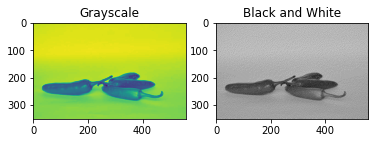

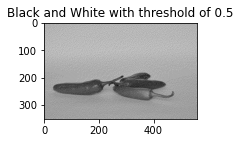

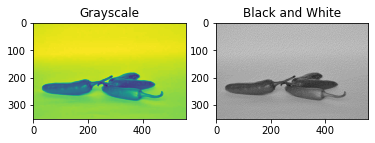

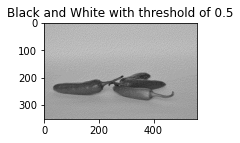

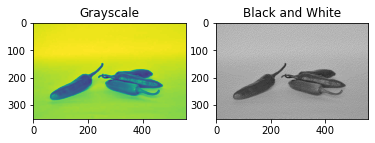

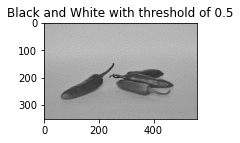

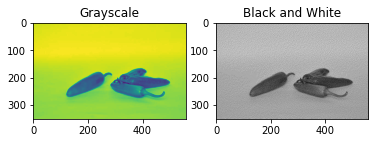

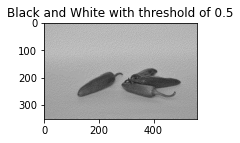

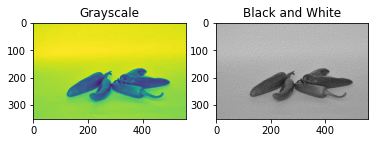

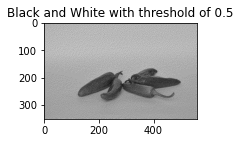

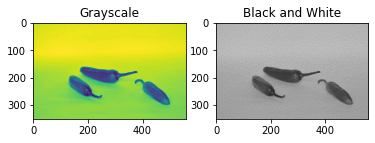

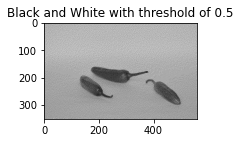

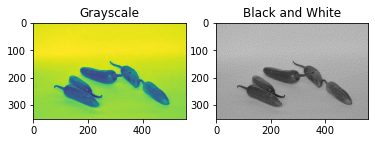

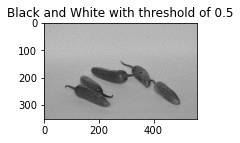

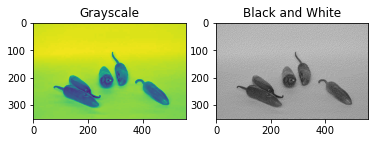

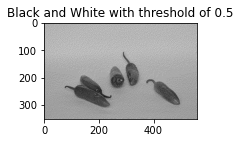

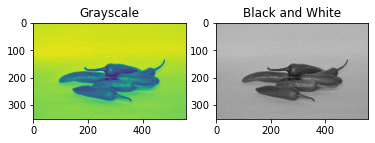

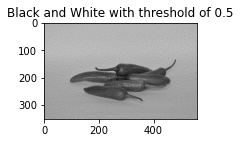

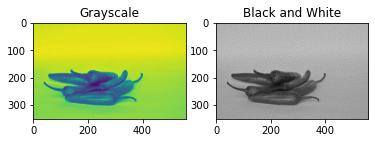

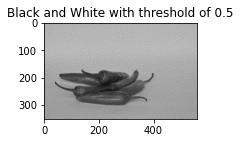

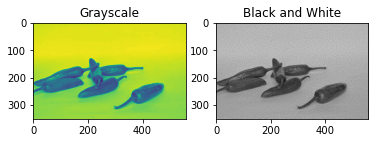

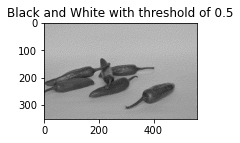

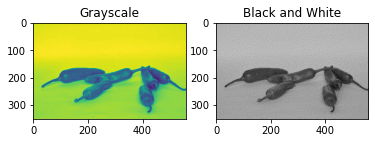

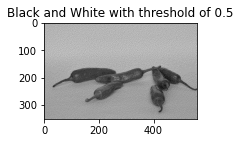

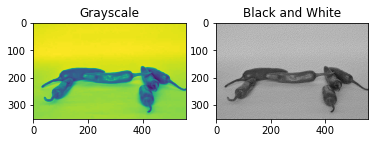

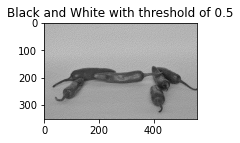

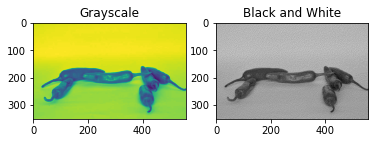

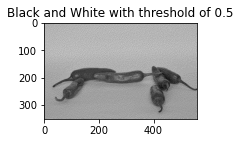

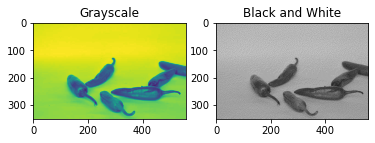

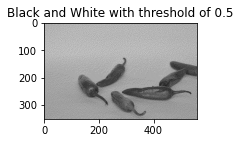

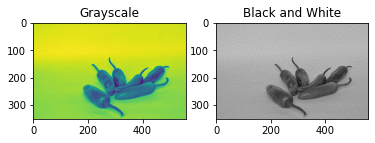

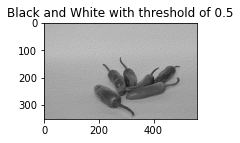

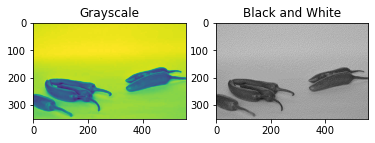

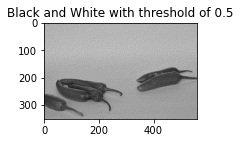

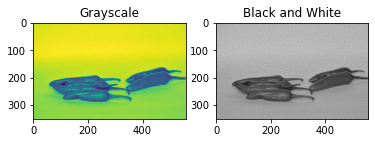

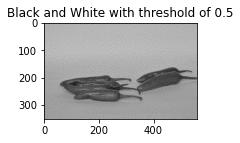

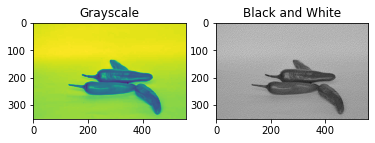

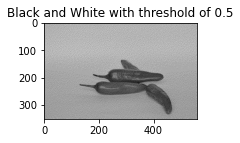

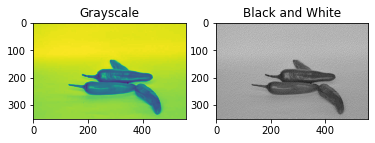

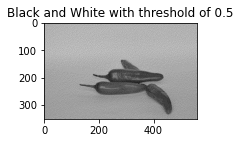

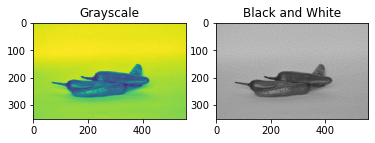

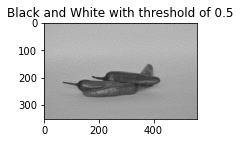

In [4]:
# choose a random image folder from 
folder = random.choice(images)

def process_images(folder):
    # read the images in the folder
    images = os.listdir(f'images/{folder}')

    # plot the images
    for image in images:
        img = Image.open(f'images/{folder}/{image}')
        plt.imshow(img)
        plt.show()
    
def enhance_clarity(folder):
    # read the images in the folder
    images = os.listdir(f'images/{folder}')

    # plot the images
    print("Enhance the clarity of the images")
    for image in images:
        img = Image.open(f'images/{folder}/{image}')
        img = img.convert('L')
        plt.subplot(1,2,1)
        plt.title('Grayscale')
        plt.imshow(img)
        img = img.convert('1')
        plt.subplot(1,2,2)
        plt.title('Black and White')
        plt.imshow(img)
        plt.show()
        img = img.convert('1')
        img = img.point(lambda x: 0 if x < 128 else 255, '1')
        plt.subplot(1,2,1)
        plt.title('Black and White with threshold of 0.5')
        plt.imshow(img)
        
        plt.show()
    
enhance_clarity(folder)

Converting to black and white with a threshold of 0.5


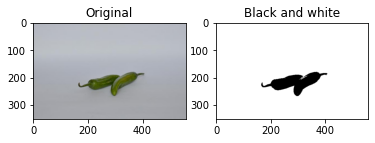

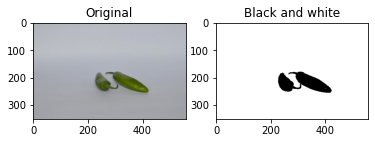

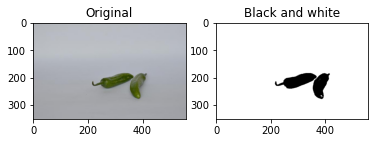

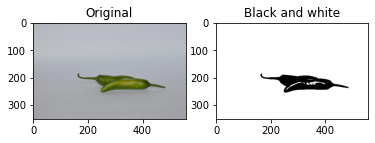

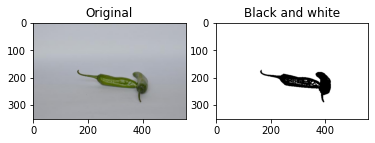

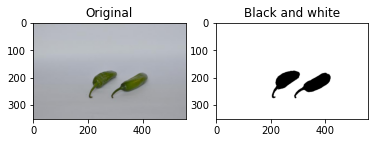

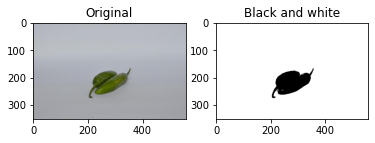

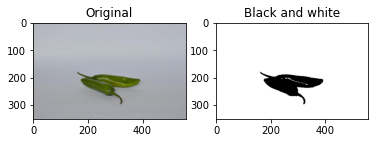

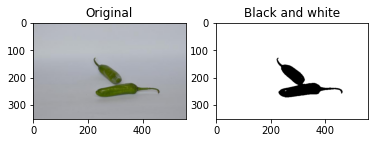

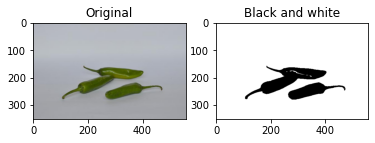

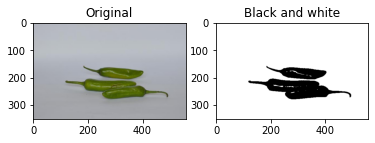

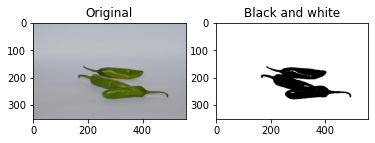

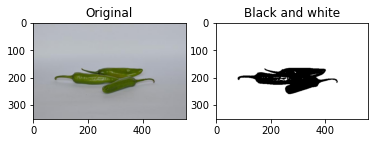

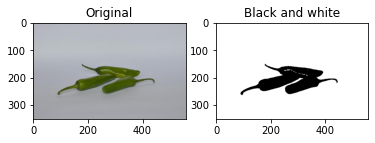

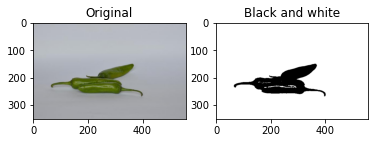

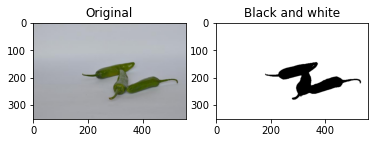

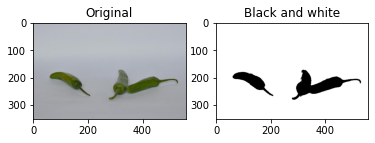

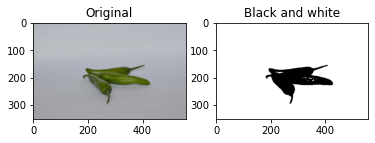

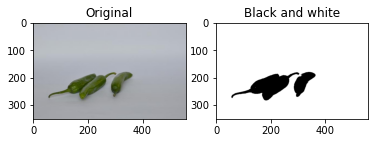

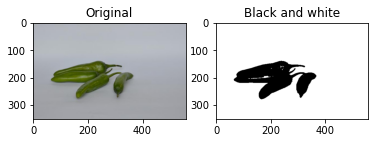

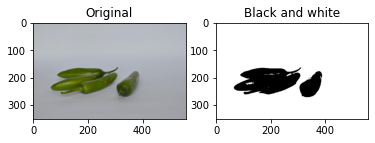

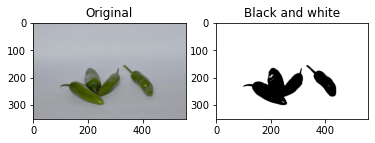

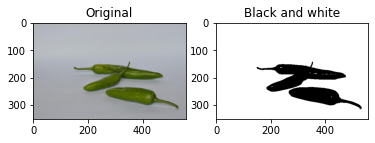

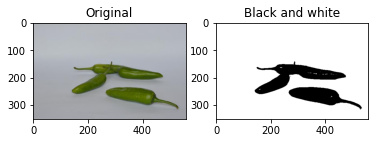

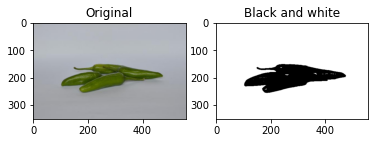

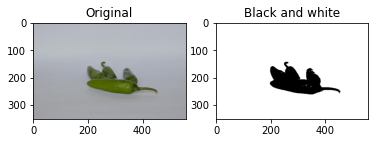

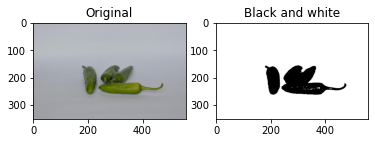

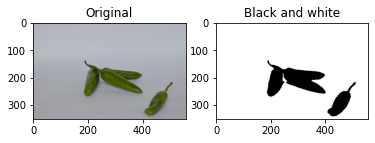

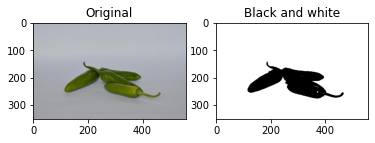

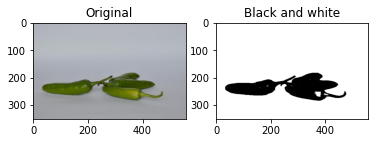

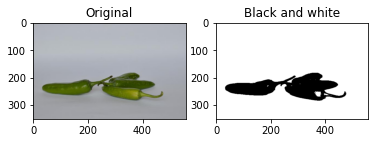

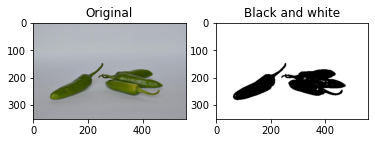

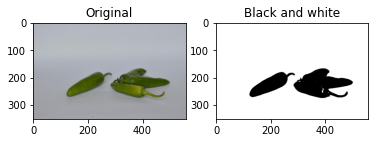

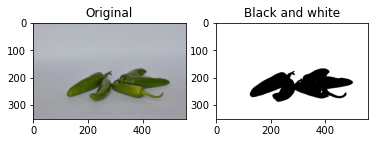

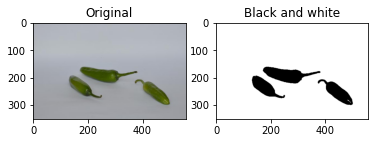

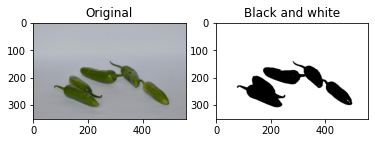

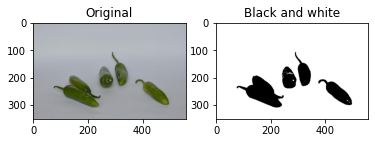

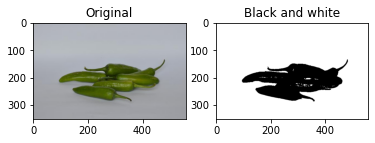

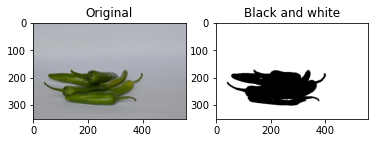

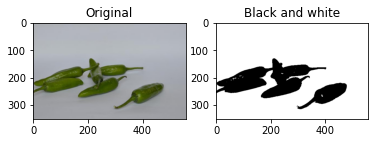

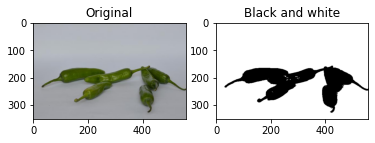

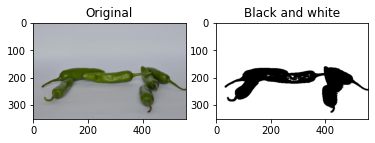

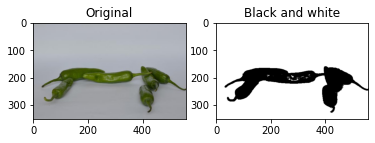

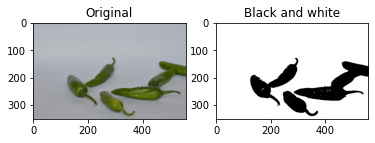

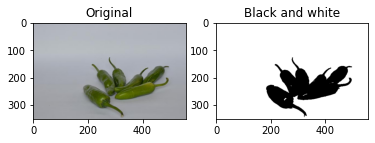

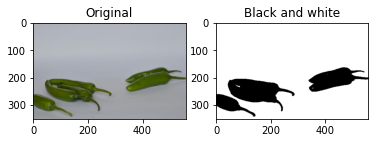

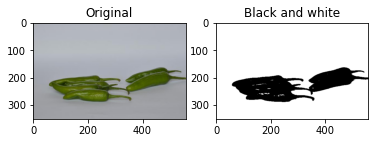

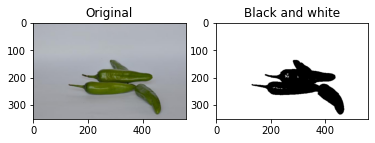

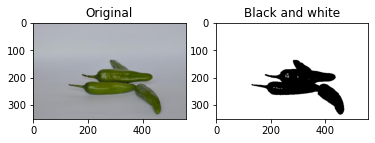

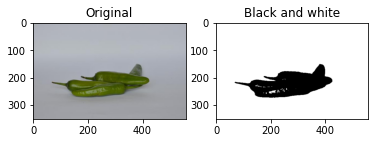

In [5]:
def black_white(folder):
    images = os.listdir(f'images/{folder}')
    # convert the images to black and white with a threshold of 0.5
    print("Converting to black and white with a threshold of 0.5")
    for image in images:
        img1 = Image.open(f'images/{folder}/{image}')
        img = img1.convert('L')
        img = img.point(lambda x: 0 if x < 128 else 255, '1')
        # subplot the original and the black and white image
        plt.subplot(1,2,1)
        plt.title('Original')
        plt.imshow(img1)
        plt.subplot(1,2,2)
        plt.title('Black and white')
        plt.imshow(img)
        plt.show() 
black_white(folder)

#### 3.2 Visualization

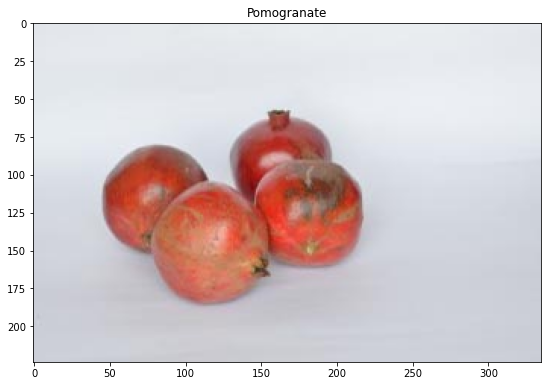

In [6]:
folder = random.choice(images)

rows,cols = 1, 5
# with the chosen folder, process the images so that all the images are of the same size and labeled with the same label
display = os.path.join('images', folder)
total_images = rows * cols
fig = plt.figure(figsize=(20,20))

for i, l in enumerate(os.listdir(display)):
    img = Image.open(os.path.join(display, l))
    plt.subplot(1,2,2)
    plt.imshow(img)
    
    if i == total_images:
        plt.title(folder)


num must be 1 <= num <= 15, not 16
num must be 1 <= num <= 15, not 17
num must be 1 <= num <= 15, not 18
num must be 1 <= num <= 15, not 19
num must be 1 <= num <= 15, not 20


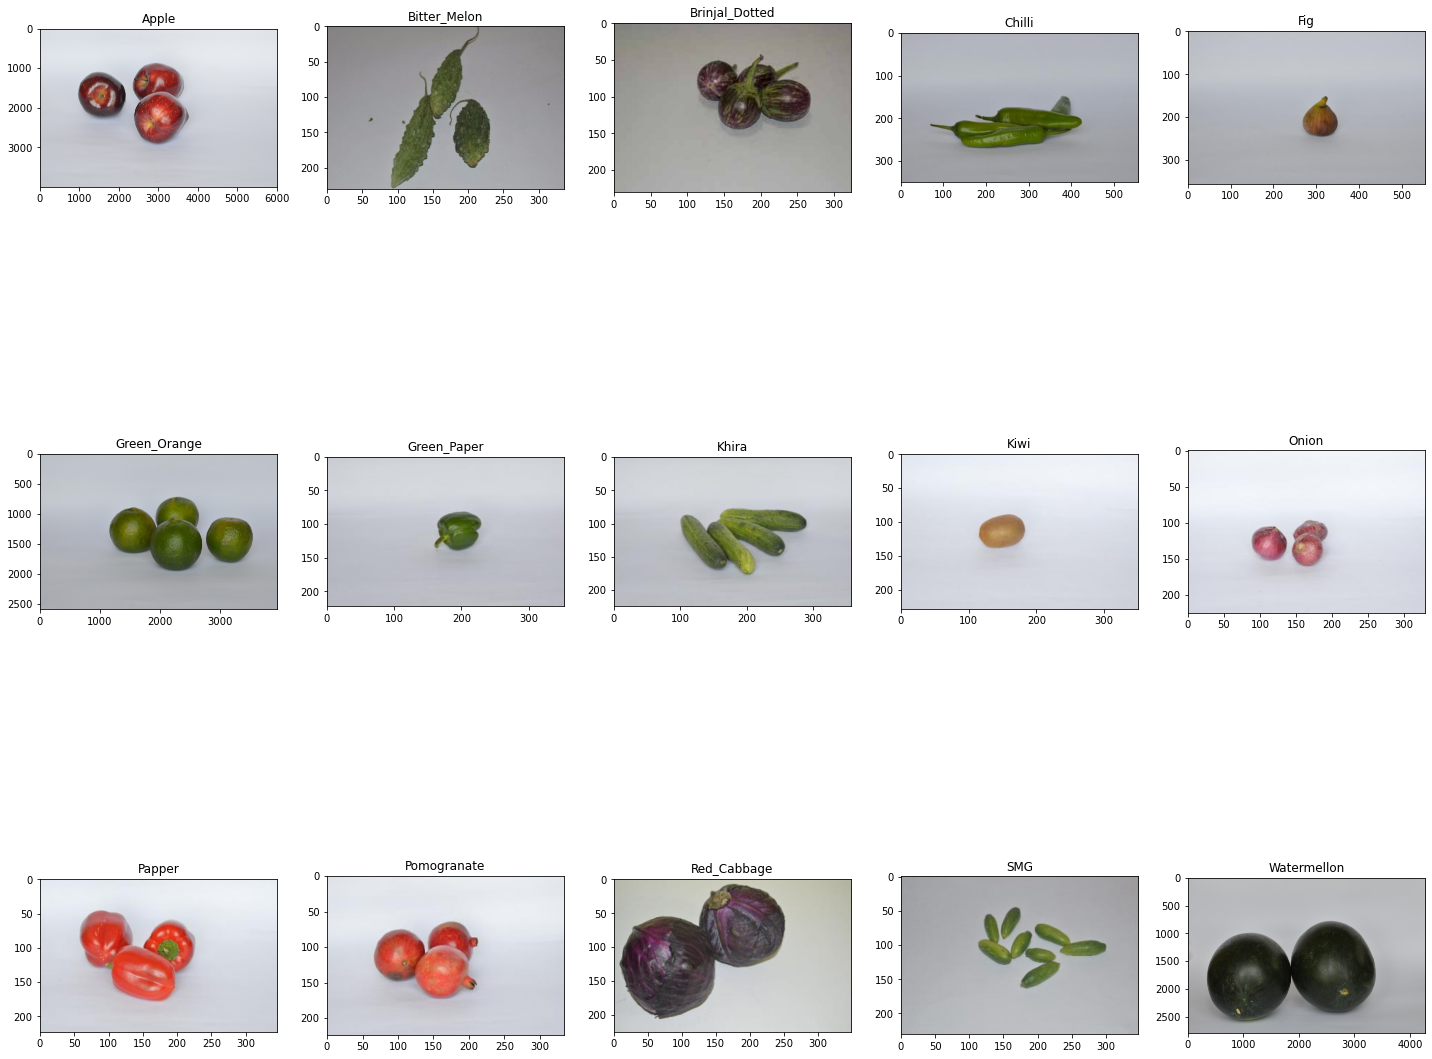

In [7]:
# lets categorize an visualize the whole dataset by picking a random image from inside the dataset folder
im = []

display = os.path.join('images')
# read the images in the folder
for f in sorted(os.listdir(display)):
    f_i = os.listdir(display + '/' + f)
    v_s = np.random.choice(f_i)
    im.append(os.path.join(display, f, v_s))
    
fif = plt.figure(figsize=(20,20))

for subplot, i in enumerate(im):
    img_ = i.split('/')[-2]
    img = plt.imread(i)
    d,g,y = img.shape
    try:
        fig = plt.subplot(3, 5, subplot + 1)
    except Exception as e:
        print(e)
    plt.title(img_)
    plt.imshow(img)
plt.tight_layout()

### Training/ Testing AI Algorithms


In [40]:
# split the dataset into training and testing sets
images = os.listdir(f'images/{folder}')
train_images = random.sample(images, int(len(images) * 0.8))
test_images = list(set(images) - set(train_images))
validation_images = random.sample(test_images, int(len(test_images) * 0.5))

# Build a k-means model
# read the images in the folder
images = os.listdir(f'images/{folder}')
# read the images in the folder
for image in images:
    img = Image.open(f'images/{folder}/{image}')
    img = img.convert('L')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')

In [49]:
# Use tensorflow to preprocess the images
def preprocess_image(image):
    image = image.resize((299,299))
    image = np.array(image)
    image = preprocess_input(image)
    return image


# read the images in the folder
images = os.listdir(f'images/{folder}')
# read the images in the folder
for image in images:
    img = Image.open(f'images/{folder}/{image}')
    img = img.convert('L')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')


preprocess_image(img)


array([[-0.99215686, -0.99215686, -0.99215686, ..., -0.99215686,
        -0.99215686, -0.99215686],
       [-0.99215686, -0.99215686, -0.99215686, ..., -0.99215686,
        -0.99215686, -0.99215686],
       [-0.99215686, -0.99215686, -0.99215686, ..., -0.99215686,
        -0.99215686, -0.99215686],
       ...,
       [-0.99215686, -0.99215686, -0.99215686, ..., -0.99215686,
        -0.99215686, -0.99215686],
       [-0.99215686, -0.99215686, -0.99215686, ..., -0.99215686,
        -0.99215686, -0.99215686],
       [-0.99215686, -0.99215686, -0.99215686, ..., -0.99215686,
        -0.99215686, -0.99215686]], dtype=float32)

In [51]:
# create the cnn model 
model = models.Sequential()
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 148, 148, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_80 (Conv2D)          (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_81 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_80 (MaxPoolin  (None, 35, 35, 64)     

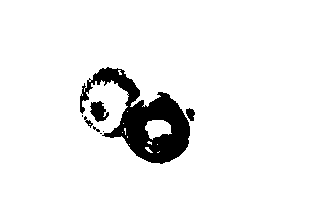

In [57]:
# Accuracy of the model
# read the images in the folder
images = os.listdir(f'images/{folder}')
# read the images in the folder
for image in images:
    img = Image.open(f'images/{folder}/{image}')
    img = img.convert('L')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')

        
def predict(image):
    image = preprocess_image(image)
    image = np.expand_dims(image, axis=0)
    return model.predict(image)
n_test = 200

list_img_predict = []
if n_test > len(test_images):
    n_test = len(test_images)
for i in range(n_test):
    predict_image = Image.open(f'images/{folder}/{test_images[i]}')
    
    predict_image = predict_image.convert('L')
    predict_image = predict_image.point(lambda x: 0 if x < 128 else 255, '1')
    predict_image = predict_image.convert('1')
    predict_image = predict_image.point(lambda x: 0 if x < 128 else 255, '1')
    
predict_image

In [62]:
X_train = []
Y_train = []
x_val = []
y_val = []

for i in range(len(train_images)):
    img = Image.open(f'images/{folder}/{train_images[i]}')
    img = img.convert('L')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')

for i in range(len(test_images)):
    img = Image.open(f'images/{folder}/{test_images[i]}')
    img = img.convert('L')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    img = img.convert('1')
    img = img.point(lambda x: 0 if x < 128 else 255, '1')
    
    list_img_predict.append(img)


# Normalize the images
X_train = np.array(X_train)
X_train = X_train / 255.0
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

    
# Normalize the images
x_val = np.array(x_val)
x_val = x_val / 255.0
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

    

In [64]:
# Augmentation 
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


# Fit the model
train_datagen.fit(X_train)
train_datagen.fit(x_val)



### 4. Output Results 

In [66]:
# Recreate the model 
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [78]:
# Get the acuracy of the model

test = 200
n = []
test
for l in test_images:
    n += [test_images ]
    
predict_images = n
predict_images

[['pom_029.jpg',
  'pom_032.jpg',
  'pom_028.jpg',
  'pom_044.jpg',
  'pom_004.jpg',
  'pom_014.jpg',
  'pom_023.jpg',
  'pom_039.jpg',
  'pom_013.jpg',
  'pom_006.jpg'],
 ['pom_029.jpg',
  'pom_032.jpg',
  'pom_028.jpg',
  'pom_044.jpg',
  'pom_004.jpg',
  'pom_014.jpg',
  'pom_023.jpg',
  'pom_039.jpg',
  'pom_013.jpg',
  'pom_006.jpg'],
 ['pom_029.jpg',
  'pom_032.jpg',
  'pom_028.jpg',
  'pom_044.jpg',
  'pom_004.jpg',
  'pom_014.jpg',
  'pom_023.jpg',
  'pom_039.jpg',
  'pom_013.jpg',
  'pom_006.jpg'],
 ['pom_029.jpg',
  'pom_032.jpg',
  'pom_028.jpg',
  'pom_044.jpg',
  'pom_004.jpg',
  'pom_014.jpg',
  'pom_023.jpg',
  'pom_039.jpg',
  'pom_013.jpg',
  'pom_006.jpg'],
 ['pom_029.jpg',
  'pom_032.jpg',
  'pom_028.jpg',
  'pom_044.jpg',
  'pom_004.jpg',
  'pom_014.jpg',
  'pom_023.jpg',
  'pom_039.jpg',
  'pom_013.jpg',
  'pom_006.jpg'],
 ['pom_029.jpg',
  'pom_032.jpg',
  'pom_028.jpg',
  'pom_044.jpg',
  'pom_004.jpg',
  'pom_014.jpg',
  'pom_023.jpg',
  'pom_039.jpg',
  'pom_01